In [ ]:
## yfinance 라이브러리
## 주식정보 받아올수 있는 라이브러리
pip install yfinance


In [10]:
import yfinance as yf
import pandas as pd

yf.download('AAPL', start = '2019-01-01')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.124851,140014000
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.168346,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.366501,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.833584,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.753815,219111200
...,...,...,...,...,...,...
2022-08-25,168.779999,170.139999,168.350006,170.029999,170.029999,51218200
2022-08-26,170.570007,171.050003,163.559998,163.619995,163.619995,78823500
2022-08-29,161.149994,162.899994,159.820007,161.380005,161.380005,73314000


1. 각자 한 종목의 데이터를 선택
2. open, close, high, low, 컬럼의 값들을 소수점 2번째 자리까지 반올림 유지
3. NaN 값이 존재하면 시가 변환
4. 파생변수 등락폭 (종가 - 시가) 생성
5. 등락율(등락폭 / 시가 * 100) 파생변수 생성
6. 시가/ 종가/ 등락폭 / 볼륨데이터를 시각화하여 표시 subplot 4개의 그래프 생성

종목 : SOFI

In [11]:
yf.download('SOFI', start = '2019-01-01')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,12.590000,12.590,11.800000,12.200000,12.200000,1371400
2021-01-05,12.150000,12.280,12.090000,12.150000,12.150000,1304000
2021-01-06,12.150000,12.200,11.890000,12.120000,12.120000,1105700
2021-01-07,12.200000,22.000,12.050000,19.139999,19.139999,64877000
2021-01-08,21.459999,22.000,17.889999,18.740000,18.740000,35657000
...,...,...,...,...,...,...
2022-08-25,6.630000,6.720,6.390000,6.690000,6.690000,53630800
2022-08-26,6.860000,6.890,6.120000,6.180000,6.180000,74448300
2022-08-29,6.090000,6.226,5.970000,6.000000,6.000000,55367700


In [13]:
amzn = yf.download('AMZN', start = "2019-01-01")
amzn.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,75.540001,76.038002,74.349998,75.098503,75.098503,139090000
2019-01-02,73.260002,77.667999,73.046501,76.956497,76.956497,159662000
2019-01-03,76.000504,76.900002,74.855499,75.014000,75.014000,139512000
2019-01-04,76.500000,79.699997,75.915497,78.769501,78.769501,183652000
2019-01-07,80.115501,81.727997,79.459503,81.475502,81.475502,159864000


In [14]:
#소수점 2번쨰자리까지 유지
amzn[["Open","Close","High","Low"]] = amzn[["Open","Close","High","Low"]].round(2)
amzn.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,75.54,76.04,74.35,75.10,75.098503,139090000
2019-01-02,73.26,77.67,73.05,76.96,76.956497,159662000
2019-01-03,76.00,76.90,74.86,75.01,75.014000,139512000
2019-01-04,76.50,79.70,75.92,78.77,78.769501,183652000
2019-01-07,80.12,81.73,79.46,81.48,81.475502,159864000


In [16]:
#결측치 존재여부 확인
amzn.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [17]:
amzn["등락폭"] = amzn["Close"] - amzn["Open"]
amzn["등락율"] = amzn["등락폭"] / amzn["Open"] * 100
amzn.head()

,Open,High,Low,Close,Adj Close,Volume,등락폭,등락율
Date,,,,,,,,
2018-12-31,75.54,76.04,74.35,75.10,75.098503,139090000,-0.44,-0.582473
2019-01-02,73.26,77.67,73.05,76.96,76.956497,159662000,3.70,5.050505
2019-01-03,76.00,76.90,74.86,75.01,75.014000,139512000,-0.99,-1.302632
2019-01-04,76.50,79.70,75.92,78.77,78.769501,183652000,2.27,2.967320
2019-01-07,80.12,81.73,79.46,81.48,81.475502,159864000,1.36,1.697454


In [18]:
## 시각화
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

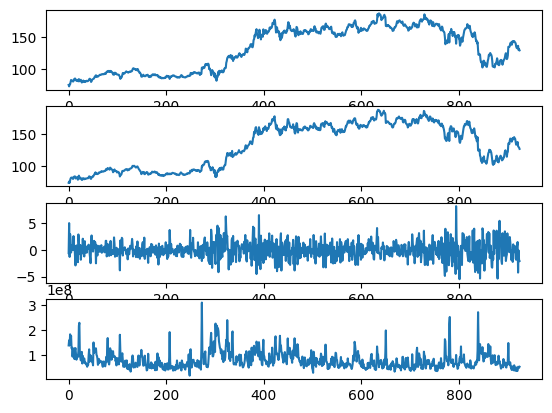

In [25]:
a = amzn["Open"].to_list()
b = amzn["Close"].to_list()
c = amzn["등락율"].to_list()
d = amzn["Volume"].to_list()

plt.subplot(4,1,1)
plt.plot(a)

plt.subplot(4,1,2)
plt.plot(b)

plt.subplot(4,1,3)
plt.plot(c)

plt.subplot(4,1,4)
plt.plot(d)

plt.show